# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Convert labels to hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Normalize Xtrain / X_Test
# x_train = x_train / 255.0
# x_test = x_test / 255.0

Training data shape (X): (50000, 32, 32, 3)
Training labels shape (y): (50000, 10)
Test data shape (X): (10000, 32, 32, 3)
Test labels shape (y): (10000, 10)
First 5 training labels: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


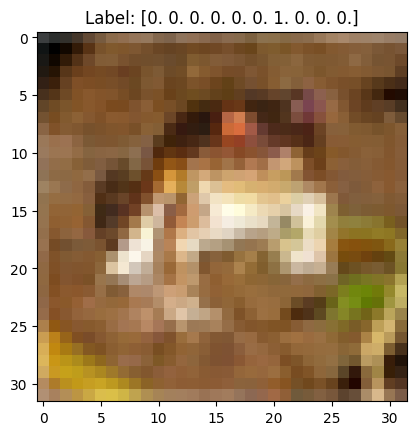

In [23]:
# Inspect the shapes of the data
print("Training data shape (X):", x_train.shape)
print("Training labels shape (y):", y_train.shape)
print("Test data shape (X):", x_test.shape)
print("Test labels shape (y):", y_test.shape)

# Display the first 5 labels
print("First 5 training labels:", y_train[:5])

# Display the first image (optional)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

In [24]:
import numpy as np

print(np.unique(y_train))

[0. 1.]


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [25]:
from keras.backend import clear_session
clear_session()

In [26]:
# Your code here :

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    # Layer 1: Convolutional Layer with 32 filters and filter size 3x3
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),

    # Layer 2: Max Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 3: Flatten Layer to convert 2D feature maps to 1D
    Flatten(),

    # Layer 4: Dense Layer with 100 units
    Dense(100, activation="relu"),

    # Layer 5: Output Dense Layer with 10 units for classification
    Dense(10, activation="softmax")
])

# Summarize the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [27]:
# Your code here :

# compile model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

#Train on cifar-10
batch_size = 512
epochs = 50

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0983 - loss: 3925.8933 - val_accuracy: 0.0952 - val_loss: 2.3025
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0979 - loss: 2.3026 - val_accuracy: 0.0954 - val_loss: 2.3026
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0982 - loss: 2.3026 - val_accuracy: 0.0954 - val_loss: 2.3026
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0956 - val_loss: 2.3026
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1022 - loss: 2.3026 - val_accuracy: 0.0956 - val_loss: 2.3026
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1022 - loss: 2.3026 - val_accuracy: 0.0956 - val_loss: 2.3026
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1015 - loss: 2.3026 - val_accuracy: 0.0956 - val_loss: 2.3026
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0958 - val_l

*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0999 - loss: 2.3025 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0996 - loss: 2.3025 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1000 - loss: 2.3025 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1006 - loss: 2.3025 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1027 - loss: 2.3025 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0985 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.0958 - val_loss:

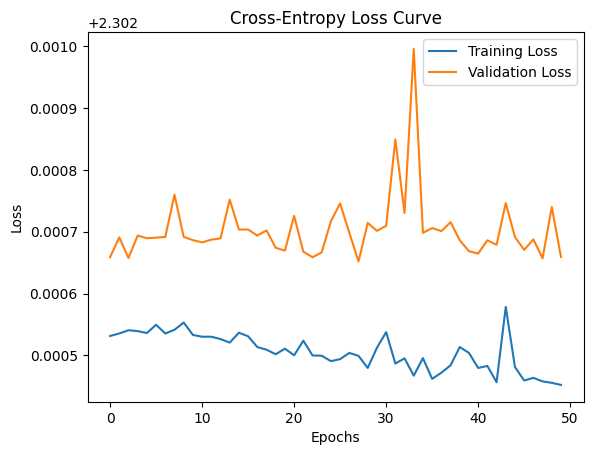

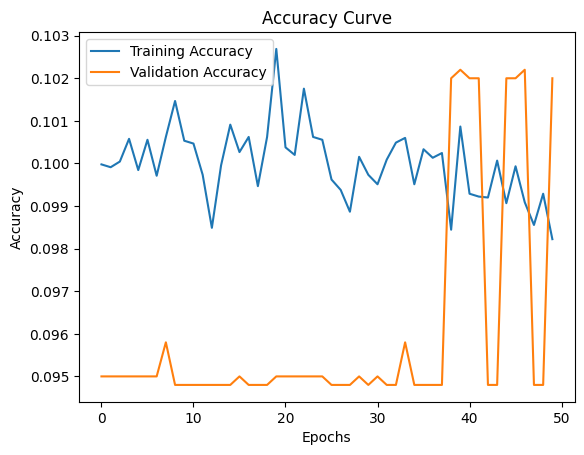

In [28]:
# Your code here :

import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plot the loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [29]:
from keras.backend import clear_session
clear_session()

In [30]:
# Your code here :

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model2 = Sequential([
    # Layer 1: Convolutional Layer with 32 filters and filter size 3x3
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),

    # Layer 2: Max Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 3: Flatten Layer to convert 2D feature maps to 1D
    Flatten(),

    # Layer 4: Dense Layer with 100 units
    Dense(128, activation="relu"),

    # Layer 5: Output Dense Layer with 10 units for classification
    Dense(10, activation="relu")
])

# Summarize the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [31]:
# Your code here :

# compile model
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

#Train on cifar-10
batch_size = 512
epochs = 50

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.1019 - loss: nan - val_accuracy: 0.0976 - val_loss: 4.9137
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1004 - loss: 4.8665 - val_accuracy: 0.1016 - val_loss: 4.9040
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1063 - loss: 4.8789 - val_accuracy: 0.1274 - val_loss: 4.8996
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1461 - loss: 4.8824 - val_accuracy: 0.1650 - val_loss: 4.8951
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1833 - loss: 4.8770 - val_accuracy: 0.1932 - val_loss: 4.8896
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1979 - loss: 4.8920 - val_accuracy: 0.2128 - val_loss: 4.8818
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2159 - loss: 4.8597 - val_accuracy: 0.2112 - val_loss: 4.8677
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2222 - loss: 4.8106 - val_accuracy: 0.2060 - val_loss: 4

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1003 - loss: 6.1916 - val_accuracy: 0.1018 - val_loss: 6.3094
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0998 - loss: 6.1571 - val_accuracy: 0.1016 - val_loss: 6.3092
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0998 - loss: 6.1667 - val_accuracy: 0.1010 - val_loss: 6.3090
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1011 - loss: 6.1932 - val_accuracy: 0.1016 - val_loss: 6.3088
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0955 - loss: 6.1980 - val_accuracy: 0.1016 - val_loss: 6.3086
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1002 - loss: 6.2056 - val_accuracy: 0.1012 - val_loss: 6.3084
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0981 - loss: 6.1023 - val_accuracy: 0.1012 - val_loss: 6.3082
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0996 - loss: 6.1643 - val_accuracy: 0.1024 - val_loss:

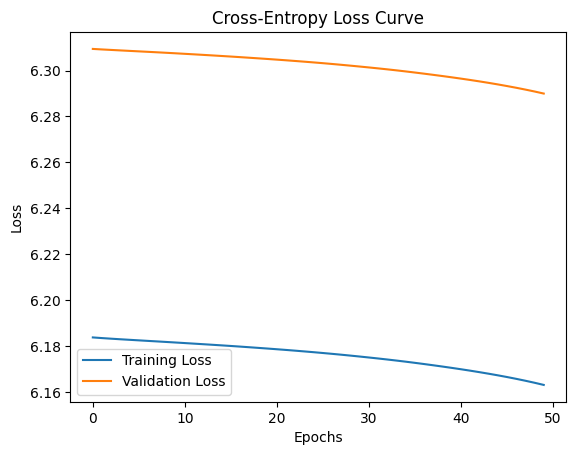

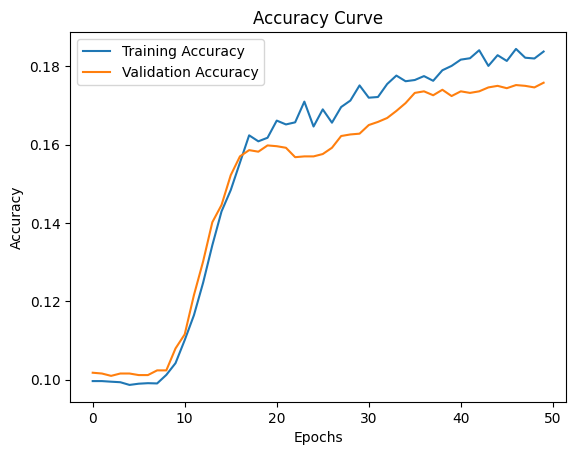

In [32]:
# Your code here :

# Your code here :

import matplotlib.pyplot as plt

# Train the model and store the history
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plot the loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


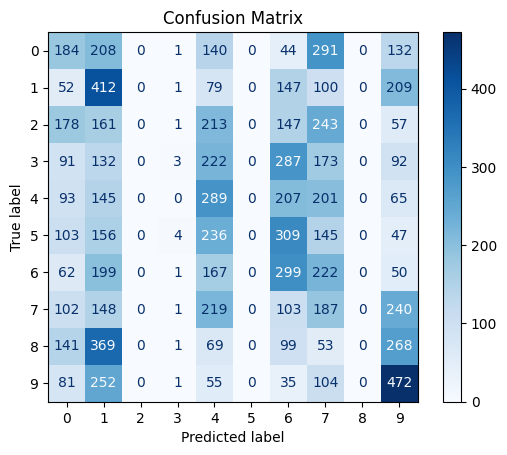

In [34]:
# Your code here :

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict the test set
y_pred_prob = model2.predict(x_test)  # Predict probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in multilabel-indicator format, convert it to multiclass
# Replace this line with the appropriate conversion if y_test has a different format
y_test_multiclass = np.argmax(y_test, axis=1)  # Convert to multiclass if y_test is multilabel-indicator

# Step 2: Compute confusion matrix
# Use the converted y_test_multiclass instead of y_test
cm = confusion_matrix(y_test_multiclass, y_pred)

# Step 3: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :



## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
